# Adventures in P-Typing
### Using Natural Language Processing and Data Science to Explore the Myers-Briggs Personality Test

## Introduction

The Myers-Brigs Type Indicator (MBTI) is a self-assessment questionnaire which helps people gain insight into how they work and learn. The test was developed by the mother-daughter partnership of Katharine Briggs and Isabel Briggs-Myers and is based on the typological theory of Carl Jung. The length of the test can range from 93 to 222 items that serve to identify a participant's personality type based on four key preferences on how they interract and deal with the world around them. 

These preferances are between the following traits:
1. Extraversion (E) vs Introversion (I)
2. Sensing (S) vs Intuition (N)
3. Thinking (T) vs Feeling (F)
4. Judging (J) vs Prospecting (P) 

The combination of these 4 preferences will determine which personality type a person would fall into. For example, an Extroverted, Sensing, Thinking, Judging person would be categorized as an ESTJ personality type. This particular type is labeled the "Executive" and is described as being dedicated, strong-willed, direct, loyal, patient, reliable, and well-ordered.   

There are 16 types in total as well as another category that indicates the level of confidence one has in their abilities which ranges from Assertive (A) to Turbulent (T). But for the purposes of this project, that last category will be left out.

## The Project

As a person who has spent years working in the educational field, I feel that knowing the personality types of your students can be an invaluable asset. Knowing that your class is predominately introverted vs extroverted can be key to lesson planning and assessment. 

Thus, my intent is to use text samples from the different personality types to build a predictive model that would be accessable and easy for a teacher to use. With the knowledge of their student's, a teacher would be better able to cater to their students' needs and preferences. 

## The Dataset

I found this [dataset](https://www.kaggle.com/datasnaek/mbti-type) on the Kaggle website. It is a collection of the last 50 forum posts from 8675 members of the [Personality Cafe](http://personalitycafe.com) community. Personality Cafe is an online platform that describes itself as "a community dedicated to helping you develop your personality through interactions with people who have the same personality as you".

I find it fascinating that such a group exists. I'm tempted to join it myself after taking the test and being categorized as an INFP (Introvert, Intuitive, Feeling, Prospecting) also know as the 'Mediator'. The 'Mediator' profile was eerily accurate and I found myself in the company of my favorite playwright, William Shakespeare. It also explained many of my personality quirks and helped me put my own career path into pespective. 

Interestingly enough, two of my best friends also ended up testing as INFPs. Although with a recent retest, they both switched over to INFJ, the 'Advocate'. 

## The Analysis

### Importing Data

### The Myers-Briggs
<img src='all16.jpg' style= 'display: block; margin-left: auto; margin-right: auto;' width=75%>

### The Creators
- Mother/daughter team of Katharine Briggs and Isabel Briggs Myers
- Based off of the work of Karl Jung
- Help people figure out the right careers for themselves
<img src='Myers-and-Briggs.jpg'>

<img src='test_sample.png' width= 75%>

<img src='traits2.png' style= 'display: block; margin-left: auto; margin-right: auto;' width=75%>

<img src='types16.jpg' style= 'display: block; margin-left: auto; margin-right: auto;' width=75%>

<img src='MyType.png' style= 'display: block; margin-left: auto; margin-right: auto;' width=75%>

### Eerily Acurate:
- Idealistic
- Career must serve the greater good
- Creative
- Great writer/communicator
- Bad with data!?!?!?

### Dataset

I found this [dataset](https://www.kaggle.com/datasnaek/mbti-type) on the Kaggle website. 

It is a collection of the last 50 forum posts from 8675 members of the [Personality Cafe](http://personalitycafe.com) community.

### The Personality Cafe: 

'A community dedicated to helping you develop your personality through interactions with people who have the same personality as you.'
<img src='PersonalityParty.png' width=400>

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
data_download = pd.read_csv('mbti_1.csv')

In [52]:
data = data_download.copy()

We start with 2 columns and 8675 rows of data. One column is the represents the personality type and the other is represents the posts.

In [53]:
print(data.shape)
pd.options.display.max_colwidth = 100
data.head()

(8675, 2)


,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1ro...
1,ENTP,'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the sam...
2,INTP,"'Good one _____ https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I kno..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the other day. Esoteric gabbing about the nature of th..."
4,ENTJ,'You're fired.|||That's another silly misconception. That approaching is logically is going to b...


### Project
- Create a model that can predict a person's personal type based off of their writing.
- Find an easy way for teachers to use this model.

### Concerns going into it:
- Is there enough data?
- Will the model be able to predict 16 different personality types accurately?
- Will it work?
- Will the results even make sense?

### Initial Exploration

The graph below indicates that there is a vast imbalance in the representation of the different personality types.  This does not bode well for building a model that is capable of accurately predicting the different categories.

The biggest group, INFP, has over 1,750 samples whereas the smallest group, ESTJ, has less than 50. I find it fascinating that these two groups are the exact opposite of one another. INFP stands for __I__ntrovert, I__n__tuitive, __F__eeling, and __P__rospecting while ESTJ stands for __E__xtrovert, __S__ensing, __T__hinking, and __J__udging. Perhaps it is the polarization of their traights that led them to being represented as such. 

I also find it interesting that the top four groups start with IN (Introvert/Intuitive) while the bottom four start with ES (Extrovert/Sensing). It would make sense that introverted people would spend more time communicating with other via these message boards while entroverts would prefer to interract with people in person. Also, it would be more likely that Intuitive people would enjoy the theoretical and complex topic of personality while sensing people maybe turned off by its lack of concrete definition.

Below is a bigger look at the text.

I see that I'll have to get rid of the ||| separators and a few embedded links. I will replace the links with 'https' since the presence of links may be a useful predictive feature.

I see too that the writer mentions their personality classification. In this case, 'ENTP'. I will remove that since I would like to create a model that can predict the personality classification of people who are not aware of their classifications. Although even with the ommision of the types, I'm certain that this self awareness and the fact that these posts come from a forum where people explore and discuss the meaning of their personality types would still play a factor in the success of the model. 

In [54]:
pd.options.display.max_colwidth = 1000
print(data.loc[1,['posts']])

posts    'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin*  That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This + Lack of Balance and Hand Eye Coordination.|||Real IQ test I score 127. Internet IQ tests are funny. I score 140s or higher.  Now, like the former responses of this thread I will mention that I don't believe in the IQ test. Before you banish...|||You know you're an ENTP when you vanish from a site for a year and a half, return, and find people are still commenting on your posts and liking your ideas/thoughts. You know you're an ENTP when you...|||http://img188.imageshack.us/img188/6422/60

### Processing the Data

As with all text samples, there is some data processing to be done.

For clean up, I will do the following:

1.  replace urls with 'https'
2.  punctuation removal (and other random symbols)
3.  remove digits 
4.  lowercase and stop word removal
5.  remove excess white space
6.  remove the types

In [55]:
import re
from string import punctuation
from nltk.corpus import stopwords

In [56]:
def remove_url(x):
    x = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}     /)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', 'https', x)
    return x
data.posts = data.posts.apply(remove_url)

In [57]:
punctuation_symbols = []

for each in list(punctuation):
    punctuation_symbols.append((each, ' '))
    
def remove_puncuation(x):
    for each in punctuation_symbols:
        x = x.replace(*each)
    return x

data.posts = data.posts.apply(remove_puncuation)

In [58]:
def remove_digits(x):
    x = ''.join([i for i in x if not i.isdigit()])
    return x

data.posts = data.posts.apply(remove_digits)

In [59]:
stop = stopwords.words('english')

def remove_stop_words(x):
    x = ' '.join([i for i in x.lower().split(' ') if i not in stop])
    return x

data.posts = data.posts.apply(remove_stop_words)

In [60]:
def remove_extra_white_space(x):
    x = ' '.join(x.split())
    return x

data.posts = data.posts.apply(remove_extra_white_space)

Through several iterations of my project, I realized that not only would I need to remove the category labels but also some Myers-Briggs abbreviations such as 'e', 'j', 'p', 'ne', 'ti', and 'si'. 

I have included them below and will continue to remove more as I discover them as I continue working with this data set.

In [61]:
def remove_types(x):
    x = re.sub(r'(i|e)(n|s)(t|f)(j|p)\w*|\b(ne|sx|ni|ti|fe|nt|se|si|nf)\b', '', x)
    return x

data.posts = data.posts.apply(remove_types)

In [62]:
pd.options.display.max_colwidth = 1000
print(data.loc[1,['posts']])

posts    finding lack posts alarming sex boring position often example girlfriend currently environment creatively use cowgirl missionary enough giving new meaning game theory hello  grin takes converse flirting acknowledge presence return words smooth wordplay cheeky grins lack balance hand eye coordination real iq test score internet iq tests funny score higher like former responses thread mention believe iq test banish know  vanish site year half return find people still commenting posts liking ideas thoughts know  https think things sometimes go old sherlock holmes quote perhaps man special knowledge special powers like rather encourages seek complex cheshirewolf tumblr com post really never thought e j p real functions judge use use   dominates  emotions rarely  also use  due strength know though ingenious saying really want try see happens playing first person shooter back drive around want see look rock paper one best makes lol guys lucky really high tumblr system hear new first

Creating TF-IDF Word Matrix
- TF-IDF (Term Frequency-Inverse Document Frequency) Vectorizer. 
- Similiar to a 'bag of words' matrix.
- Each word is weighted depending on how often it shows up in the ENTIRE sample (corpse).
- The more often a word appears, the less distinct it is and so the less weight it gets.
- "Bi-grams"

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(analyzer='word', ngram_range=(1,2), min_df = 0.02, 
                     stop_words = 'english', norm='l2')

tfidf_matrix = tf.fit_transform(data.posts)

print('Number of documents:', tfidf_matrix.shape[0])
print('Number of features:', tfidf_matrix.shape[1])

print('\nNote: According to my mentor, this is still not a lot of words/features')

Number of documents: 8675
Number of features: 3459

Note: According to my mentor, this is still not a lot of words/features


In [64]:
tfidf_feature_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=tf.get_feature_names())
tfidf_feature_matrix.head()

,abilities,ability,able,absolute,absolutely,absolutely love,abstract,absurd,abuse,abusive,...,yes yes,yesterday,yo,young,younger,youth,youtube,yup,zero,zone
0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.083409,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.000000,0.031013,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.108889,0.037769,0.000000,0.091012,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.069786,0.0,0.0
3,0.0,0.000000,0.064068,0.060195,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


Below are my first two models. 

I chose to go with the Random Forest and Logistic Regression Models.

I did attempt them with Gradient Boosting and Support Vector Machines. The Gradient Boosting took far too long, so I stopped it before it could finish. The Support Vector Machine took about 15 minutes and yielded results similiar to the logistic regression model.

### Predictive Models 
Chosen:
- Random Forests: Feature Importance method
- Logistic Regression: Gave me the best accuracy scores

Tried but passed on:
- Support Vector Machine: Took 15 minutes and same accuracy scores as Logistic Regression
- Gradient Boosting: Timed out

Features: 
- TF-IDF Matrix

Target: 
- Personality Types

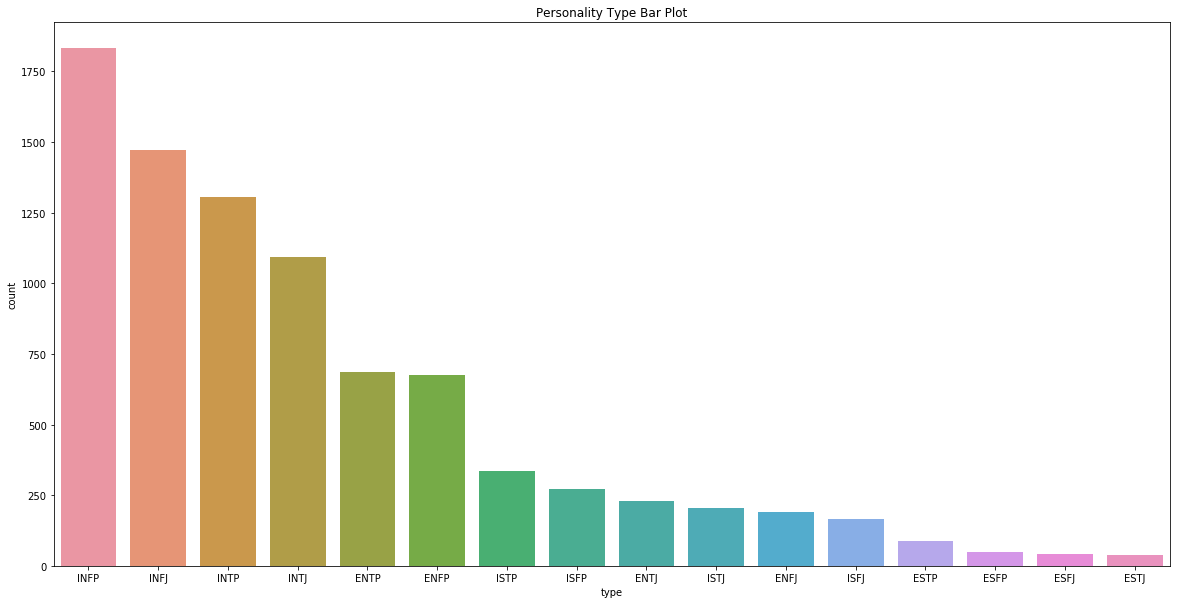

In [65]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.countplot(x="type", data=data, order = data.type.value_counts().index)
plt.title('Personality Type Bar Plot')
plt.show()

In [66]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [67]:
X = tfidf_feature_matrix
Y = data['type']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

rfc = ensemble.RandomForestClassifier()

rfc.fit(X_train, Y_train)

print('\nRandom Forest Classifier:')
print('Training set score:', rfc.score(X_train, Y_train))
print('Test set score:', rfc.score(X_test, Y_test)) 

lr = LogisticRegression()
lr.fit(X_train, Y_train)

print('\nLogistic Regression:')
print('Training set score:', lr.score(X_train, Y_train))
print('Test set score:', lr.score(X_test, Y_test))


Random Forest Classifier:
Training set score: 0.993083307716
Test set score: 0.20378054403

Logistic Regression:
Training set score: 0.583922533046
Test set score: 0.359612724758


Still better than completely random:
- 1/16 = 0.0625
<img src='NotTooShabby.jpg'>

As somewhat expected, neither the Random Forest Classifier nor the Logistic Regression models did very well. This is primarily due to the fact that several of the groups were ill represented. 

The following confusion matrix supports that hypothesis as the 'IN' personality types are the ones that were identified most often. INFP, for example, had a 70% recall score. But that is only because the model kept predicting the category due to its high level of representation. Because of this, the INFP precision score suffered at 40% accuracy as 60% of the samples that were identified as INFP were actually some other category. 

Several of the other categories had ZERO recall and precision scores. This is due to their severe lack of representation. The model didn't even bother to even predict their precence at all. 

ISTJ and ISTP both had 100% precision but that is due such a low number of predictions made by the model in favor of those two categories. Meanwhile, their recall scores were just 1-2%. So the vast majority of the ISTJ and ISTP samples were left unidentified. 

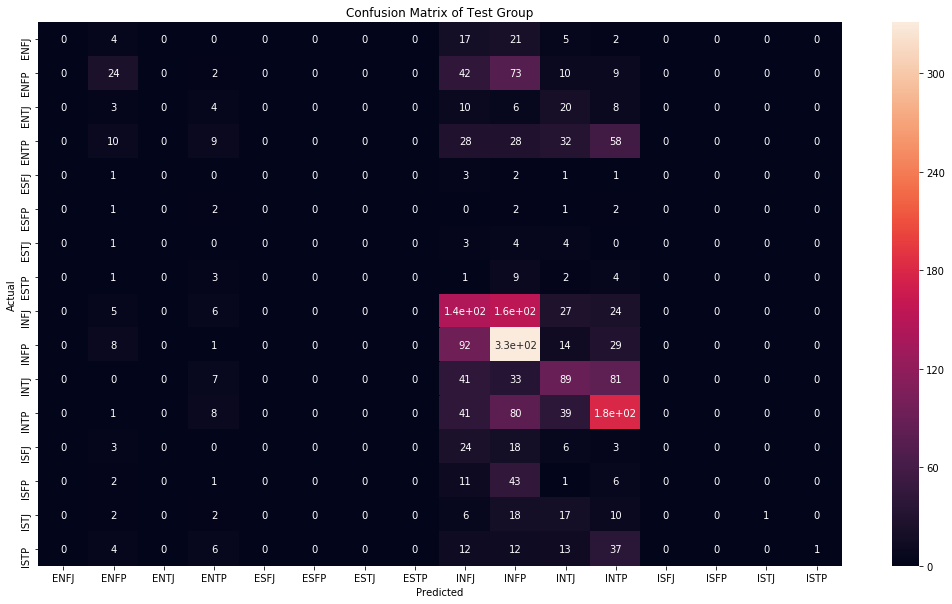

In [68]:
from sklearn.metrics import confusion_matrix
personality_types = sorted(data.type.unique())

Y_pred = lr.predict(X_test)
confusion_array = confusion_matrix(Y_test, Y_pred)

df_cm = pd.DataFrame(confusion_array, index = [i for i in personality_types],
                  columns = [i for i in personality_types])

plt.figure(figsize = (18,10))
sns.heatmap(df_cm, annot=True)
plt.title('Confusion Matrix of Test Group')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [20]:
from sklearn.metrics import classification_report

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
print(classification_report(Y_test, Y_pred, target_names=personality_types))

             precision    recall  f1-score   support

       ENFJ       0.00      0.00      0.00        49
       ENFP       0.34      0.15      0.21       160
       ENTJ       0.00      0.00      0.00        51
       ENTP       0.18      0.05      0.08       165
       ESFJ       0.00      0.00      0.00         8
       ESFP       0.00      0.00      0.00         8
       ESTJ       0.00      0.00      0.00        12
       ESTP       0.00      0.00      0.00        20
       INFJ       0.30      0.40      0.34       361
       INFP       0.40      0.70      0.51       475
       INTJ       0.32      0.35      0.33       251
       INTP       0.40      0.52      0.45       350
       ISFJ       0.00      0.00      0.00        54
       ISFP       0.00      0.00      0.00        64
       ISTJ       1.00      0.02      0.04        56
       ISTP       1.00      0.01      0.02        85

avg / total       0.34      0.36      0.30      2169



## Predictive Models Based on Individual Traits 

- New columns that would identify each sample by their individual traits: Introvert/Extrovert, Intuitive/Sensing, Thinking/Feeling, and Judging/Prospecting.
- Each model will now be binary instead of having to choose between 16 different categories.
- Take the predictions and put them back together to get the personality type.

In [21]:
tfidf_feature_matrix2 = tfidf_feature_matrix.copy()

In [22]:
tfidf_feature_matrix2['type_IE'] = [x[0] for x in data.type]
tfidf_feature_matrix2['type_NS'] = [x[1] for x in data.type]
tfidf_feature_matrix2['type_TF'] = [x[2] for x in data.type]
tfidf_feature_matrix2['type_JP'] = [x[3] for x in data.type]

In [23]:
tfidf_feature_matrix2.head()

,abilities,ability,able,absolute,absolutely,absolutely love,abstract,absurd,abuse,abusive,...,younger,youth,youtube,yup,zero,zone,type_IE,type_NS,type_TF,type_JP
0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,I,N,F,J
1,0.0,0.000000,0.031013,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,E,N,T,P
2,0.0,0.108889,0.037769,0.000000,0.091012,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.069786,0.0,0.0,I,N,T,P
3,0.0,0.000000,0.064068,0.060195,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,I,N,T,J
4,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,E,N,T,J


Below is a breakdown of how balanced the number of samples are in each pair. The most even numbered being Thinking/Feeling while the least being Intuitive/Sensing. 

In [24]:
print('Breakdown of Types\n')

print(tfidf_feature_matrix2.type_IE.value_counts(), '\n')
print(tfidf_feature_matrix2.type_NS.value_counts(), '\n')
print(tfidf_feature_matrix2.type_TF.value_counts(), '\n')
print(tfidf_feature_matrix2.type_JP.value_counts(), '\n')

Breakdown of Types

I    6676
E    1999
Name: type_IE, dtype: int64 

N    7478
S    1197
Name: type_NS, dtype: int64 

F    4694
T    3981
Name: type_TF, dtype: int64 

P    5241
J    3434
Name: type_JP, dtype: int64 



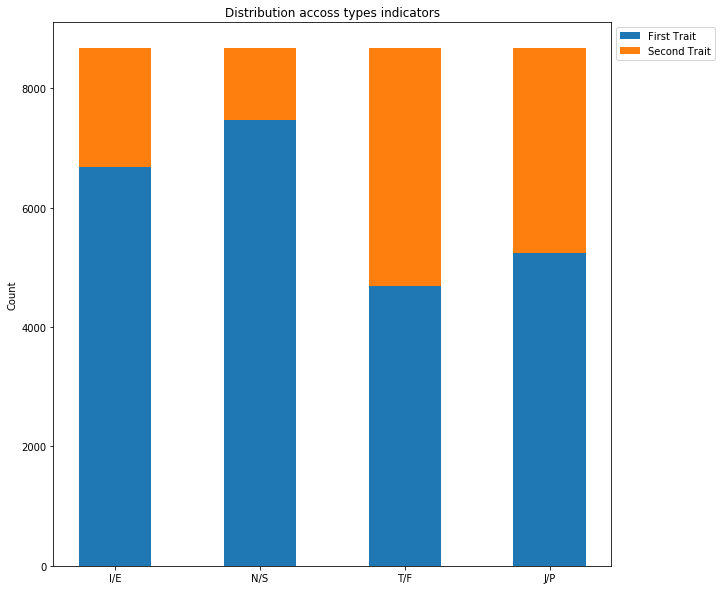

In [25]:
N = 4
but = (tfidf_feature_matrix2.type_IE.value_counts()[0], tfidf_feature_matrix2.type_NS.value_counts()[0], 
       tfidf_feature_matrix2.type_TF.value_counts()[0], tfidf_feature_matrix2.type_JP.value_counts()[0])
top = (tfidf_feature_matrix2.type_IE.value_counts()[1], tfidf_feature_matrix2.type_NS.value_counts()[1], 
       tfidf_feature_matrix2.type_TF.value_counts()[1], tfidf_feature_matrix2.type_JP.value_counts()[1])

ind = np.arange(N)    # the x locations for the groups
width = 0.5      # the width of the bars: can also be len(x) sequence

plt.figure(figsize=(10,10))
p1 = plt.bar(ind, but, width)
p2 = plt.bar(ind, top, width, bottom=but)

plt.ylabel('Count')
plt.title('Distribution accoss types indicators')
plt.xticks(ind, ('I/E',  'N/S', 'T/F', 'J/P',))
plt.legend((p1[0], p2[0]), ('First Trait', 'Second Trait'),bbox_to_anchor=(1, 1))

plt.show()

- I will take sample sizes to balance the groups.
- In order from smallest to biggest sample sizes...

### Intuitive/Sensing Model:
<img src='Intuitive.png' style="float: left; width: 45%; margin-right: 1%; margin-bottom: 0.5em;">
<img src='Sensing.png' style="float: right; width: 45%; margin-right: 1%; margin-bottom: 0.5em;">

Intutive:
- Likes abstract thinking
- Looks beyond the physical

Sensing:
- Likes concrete information
- Relies mostly on their senses

<img src='SensIntuit.jpg' width=600>

In [26]:
data_N = tfidf_feature_matrix2.loc[tfidf_feature_matrix2['type_NS'] == 'N'].sample(n=1197)
print(data_N.shape)
data_S = tfidf_feature_matrix2.loc[tfidf_feature_matrix2['type_NS'] == 'S']
print(data_S.shape)
data_NS = pd.concat([data_N, data_S])
print(data_NS.shape)

(1197, 3463)
(1197, 3463)
(2394, 3463)


In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

drop_list = ['type_IE','type_NS',"type_TF",'type_JP']

In [28]:
Y = data_NS['type_NS']
X = data_NS.drop(drop_list, axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

rfc_NS = ensemble.RandomForestClassifier()

rfc_NS.fit(X_train, Y_train)

print('\nRandom Forest Classifier:')
print('Training set score:', rfc_NS.score(X_train, Y_train))
rfc_scores_NS = cross_val_score(rfc_NS, X, Y, cv=5)
print('Cross Validation Scores:\n' , rfc_scores_NS )  
print('Average score: ', np.mean(rfc_scores_NS))

lr_NS = LogisticRegression()
lr_NS.fit(X_train, Y_train)

print('\nLogistic Regression:')
print('Training set score:', lr_NS.score(X_train, Y_train))
lr_scores_NS = cross_val_score(lr_NS, X, Y, cv=5)
print('Cross Validation Scores:\n' , lr_scores_NS)
print('Average score: ', np.mean(lr_scores_NS))


Random Forest Classifier:
Training set score: 0.989415041783
Cross Validation Scores:
 [ 0.53333333  0.53333333  0.55020921  0.53138075  0.51046025]
Average score:  0.531743375174

Logistic Regression:
Training set score: 0.899164345404
Cross Validation Scores:
 [ 0.67708333  0.68125     0.67782427  0.71966527  0.66317992]
Average score:  0.68380055788


- Relatively unstable Random Forest Feature Importance

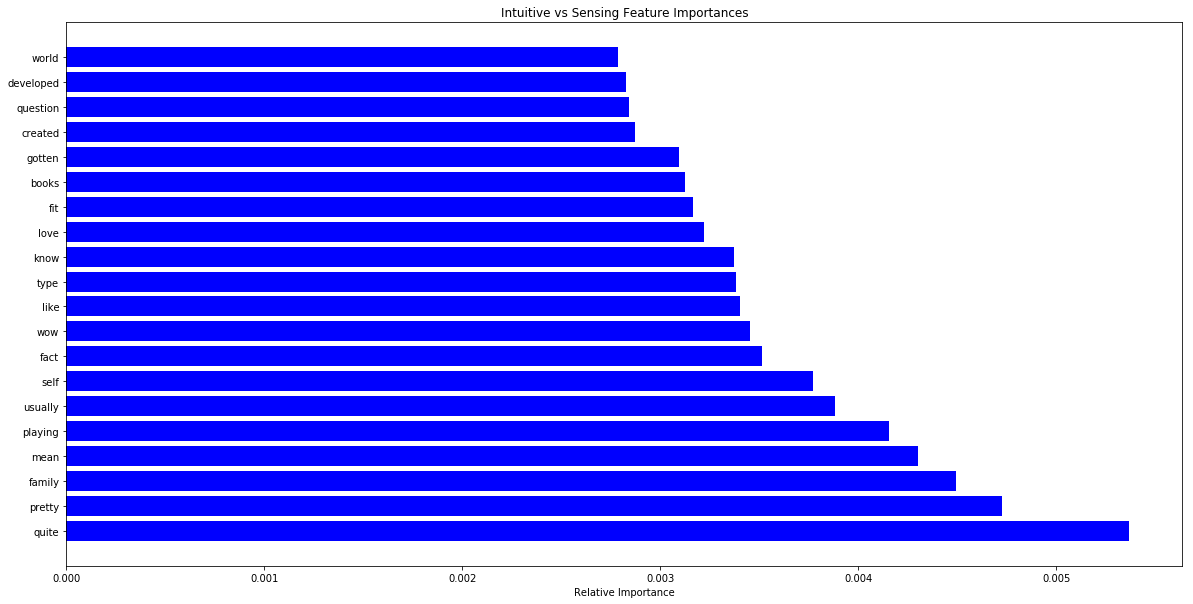

In [29]:
features = X.columns
importances = rfc_NS.feature_importances_
indices = np.argsort(importances)[::-1]
top_k = 20
indices = indices[:top_k]

plt.title('Intuitive vs Sensing Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

- Reoccuring words include: believe, fact, idea, world, think.

With an average Random Forest Score of about 0.55 and Logistic Regression score of 0.67, this model didn't do too well. Although the feature importance taken from the Random Forest Model did offer some insight. 

Intuitive vs Sensing refers to how a person takes in information. As the name would imply, a sensing person has a preference for accessing information through their senses. Basically, what they can see, hear, touch, taste, and smell. An intuitive person would try to gain knowledge beyond the concrete senses and will interpret information through more abstract ideas and feelings. Not just solely on what's right in front of them. 

It is appropriate then that some of the key features would be the words 'believe', 'fact', and 'idea'. 

Admittedly, the other top features where not stable at all. That is probably due to the small sample size of 1197 for both I and S. But 'believe', 'fact', and 'idea' were consistently in the top 20.

The confusion matrix below based off of the Logistic Regression model was consistent with the average scores.

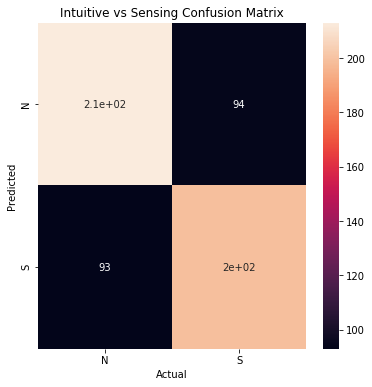

             precision    recall  f1-score   support

          N       0.69      0.70      0.69       306
          S       0.68      0.68      0.68       293

avg / total       0.69      0.69      0.69       599



In [30]:
personality_types_NS = sorted(data_NS.type_NS.unique() )

Y_pred = lr_NS.predict(X_test)
confusion_array = confusion_matrix(Y_test, Y_pred)

df_cm = pd.DataFrame(confusion_array, index = [i for i in personality_types_NS],
                  columns = [i for i in personality_types_NS])

plt.figure(figsize = (6,6))
sns.heatmap(df_cm, annot=True)
plt.title('Intuitive vs Sensing Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

print(classification_report(Y_pred, Y_test,  target_names=personality_types_NS))

### Introverted/Extroverted Model:
<img src='Introvert.png' style="float: left; width: 45%; margin-right: 1%; margin-bottom: 0.5em;">
<img src='Extrovert.png' style="float: right; width: 45%; margin-right: 1%; margin-bottom: 0.5em;">

Introverted:
- Low threshold for stimulation
- Gets tired easily being around other people

Extroverted:
- High threshold for stimulation
- Gets energized around others

<img src='IntroExtro.jpg'>

In [31]:
data_I = tfidf_feature_matrix2.loc[tfidf_feature_matrix2['type_IE'] == 'I'].sample(n=1999)
print(data_I.shape)
data_E = tfidf_feature_matrix2.loc[tfidf_feature_matrix2['type_IE'] == 'E']
print(data_E.shape)
data_IE = pd.concat([data_I, data_E])
print(data_IE.shape)

(1999, 3463)
(1999, 3463)
(3998, 3463)


In [32]:
Y = data_IE['type_IE']
X = data_IE.drop(drop_list, axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

rfc_IE = ensemble.RandomForestClassifier()

rfc_IE.fit(X_train, Y_train)

print('\nRandom Forest Classifier:')
print('Training set score:', rfc_IE.score(X_train, Y_train))
rfc_score_IE = cross_val_score(rfc_IE, X, Y, cv=5)
print('Cross Validation Scores:\n' , rfc_score_IE)
print('Average Score: ', np.mean(rfc_score_IE))

lr_IE = LogisticRegression()
lr_IE.fit(X_train, Y_train)

print('\nLogistic Regression:')
print('Training set score:', lr_IE.score(X_train, Y_train))
lr_score_IE = cross_val_score(lr_IE, X, Y, cv=5)
print('Cross Validation Scores:\n' , lr_score_IE)
print('Average Score: ', np.mean(lr_score_IE))



Random Forest Classifier:
Training set score: 0.984656437625
Cross Validation Scores:
 [ 0.52625     0.55        0.56625     0.5375      0.53258145]
Average Score:  0.542516290727

Logistic Regression:
Training set score: 0.847898599066
Cross Validation Scores:
 [ 0.6575      0.6625      0.70125     0.6825      0.67919799]
Average Score:  0.676589598997


- Slightly better Random Forest accuracy
- Slightly worse Logistic Regression accuracy
- Slightly more stable Feature Importance

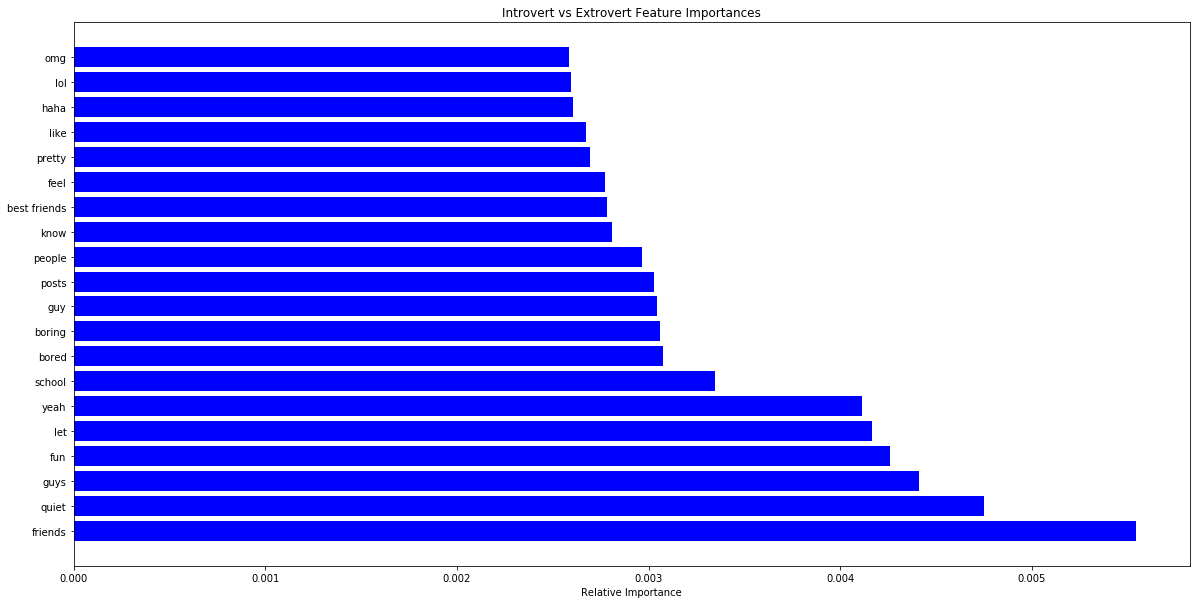

In [33]:
features = X.columns
importances = rfc_IE.feature_importances_
indices = np.argsort(importances)[::-1]
top_k = 20
indices = indices[:top_k]

plt.title('Introvert vs Extrovert Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

- Reoccuring words: fun, friends, bored, lol, haha, think, and quiet.
- Might be easier to distinguish Introvert vs Extrovert words.

The Introvert vs Extrovert model did about as well as the Intuitive vs Sensing model.

Contrary to popular belief, introversion vs extroversion isn't about shyness. It has more to do with how much social stimulation a person can sustain before starting to tire. An introverted person has a low threshold for stimulation and thus can't spend too much time in large and busy social situations. An extroverted person, on the other hand, would thrive in such a situation since they require and enjoy the extra stimulation. 

There were a few features that did show up consistantly, although not everytime, in the top 20 that I found to be insightful. Words like 'fun', 'friends', 'bored' and 'lol' could indicate a more extroverted personality while words like 'think' and 'quiet' could be associated with introversion.

The confusion matrix was in accordance with the above scores.

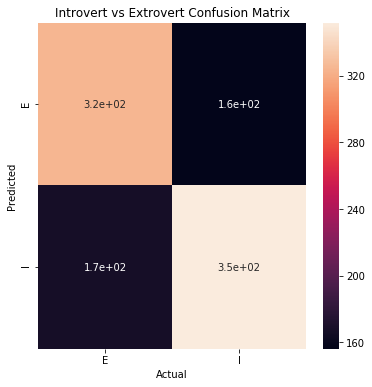

             precision    recall  f1-score   support

          E       0.68      0.66      0.67       492
          I       0.68      0.69      0.69       508

avg / total       0.68      0.68      0.68      1000



In [34]:
personality_types_IE = sorted(data_IE.type_IE.unique() )

Y_pred = lr_IE.predict(X_test)
confusion_array = confusion_matrix(Y_test, Y_pred)

df_cm = pd.DataFrame(confusion_array, index = [i for i in personality_types_IE],
                  columns = [i for i in personality_types_IE])

plt.figure(figsize = (6,6))
sns.heatmap(df_cm, annot=True)
plt.title('Introvert vs Extrovert Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

print(classification_report(Y_pred, Y_test,  target_names=personality_types_IE))

### Judging/Prospecting Model:
<img src='judging.png' style="float: left; width: 45%; margin-right: 1%; margin-bottom: 0.5em;">
<img src='prospecting.png' style="float: right; width: 45%; margin-right: 1%; margin-bottom: 0.5em;">

Judging:
- Likes structure

Prospecting:
- Likes spontaneity 

<img src='JudgingProspecting.jpg'>

In [35]:
data_P = tfidf_feature_matrix2.loc[tfidf_feature_matrix2['type_JP'] == 'P'].sample(n=3434)
print(data_P.shape)
data_J = tfidf_feature_matrix2.loc[tfidf_feature_matrix2['type_JP'] == 'J']
print(data_J.shape)
data_JP = pd.concat([data_J, data_P])
print(data_JP.shape)

(3434, 3463)
(3434, 3463)
(6868, 3463)


In [36]:
Y = data_JP['type_JP']
X = data_JP.drop(drop_list, axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

rfc_JP = ensemble.RandomForestClassifier()

rfc_JP.fit(X_train, Y_train)

print('\nRandom Forest Classifier:')
print('Training set score:', rfc_JP.score(X_train, Y_train))
rfc_scores_JP = cross_val_score(rfc_JP, X, Y, cv=5)
print('Cross Validation Scores:\n' , rfc_scores_JP)
print('Average Scores: ', np.mean(rfc_scores_JP))

lr_JP = LogisticRegression()
lr_JP.fit(X_train, Y_train)

print('\nLogistic Regression:')
print('Training set score:', lr_JP.score(X_train, Y_train))
lr_scores_JP = cross_val_score(lr_JP, X, Y, cv=5)
print('\nCross Validation Scores:\n' , lr_scores_JP)
print('Average Scores: ', np.mean(lr_scores_JP))


Random Forest Classifier:
Training set score: 0.9846631722
Cross Validation Scores:
 [ 0.52256186  0.50727802  0.53275109  0.51237263  0.53717201]
Average Scores:  0.522427124312

Logistic Regression:
Training set score: 0.80198019802

Cross Validation Scores:
 [ 0.63027656  0.61135371  0.62299854  0.62736536  0.62026239]
Average Scores:  0.622451313651


- Overall worst accuracy scores
- Random Forest: about 1% worse
- Logistic Regression: about 5% worse
- Very unstable Feature Importance

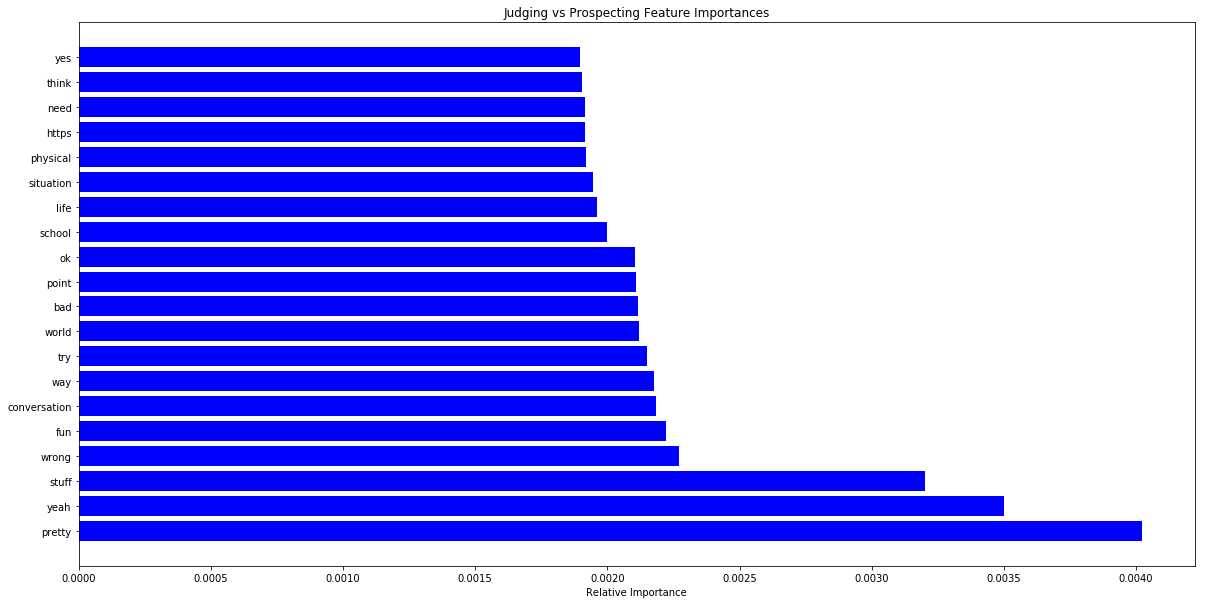

In [37]:
features = X.columns
importances = rfc_JP.feature_importances_
indices = np.argsort(importances)[::-1]
top_k = 20
indices = indices[:top_k]

plt.title('Judging vs Prospecting Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

- Reoccuring words: plan, simply, time, situation, try
- Maybe the structure of the sentences would be more telling than word choice.

Despite having more samples, the Judging vs Prospecting model did unexpectedly worse than the previous two. 

This maybe due to the nature of the two traits. To clarify, the word Judging as it is used in this context isn't about forming an opinion or conclusion about something. Instead, it has to do with how structured a person is. According the Myers-Briggs, a judging person likes to make plans and stay organized. In contrast to that, a prospecting person likes to keep their options open and be spontaneous.

This may be why the model did worse even though it had more samples. Since a person would demonstrate this in their writing more by the stucture and style of their writing as opposed to their word choice.

The feature importance as well was completely instable where the same words rarely showed up consistently and none of them made any sense. 

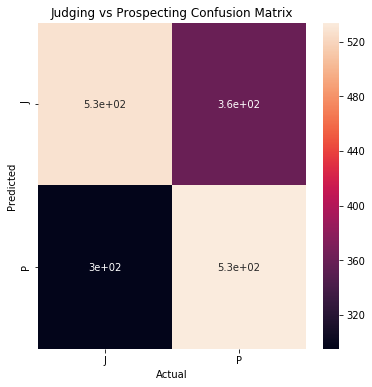

             precision    recall  f1-score   support

          J       0.59      0.64      0.62       823
          P       0.64      0.60      0.62       894

avg / total       0.62      0.62      0.62      1717



In [38]:
personality_types_JP = sorted(tfidf_feature_matrix2.type_JP.unique())

Y_pred = lr_JP.predict(X_test)
confusion_array = confusion_matrix(Y_test, Y_pred)

df_cm = pd.DataFrame(confusion_array, index = [i for i in personality_types_JP],
                  columns = [i for i in personality_types_JP])

plt.figure(figsize = (6,6))
sns.heatmap(df_cm, annot=True)
plt.title('Judging vs Prospecting Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

print(classification_report(Y_pred, Y_test,  target_names=personality_types_JP))

### Thinking/Feeling Model:
<img src='Thinking.png' style="float: left; width: 45%; margin-right: 1%; margin-bottom: 0.5em;">
<img src='Feeling.png' style="float: right; width: 45%; margin-right: 1%; margin-bottom: 0.5em;">

Thinking:
- Base decisions on facts
- Very logical

Feeling:
- Base decisions of emotions
- Very empathetic

<img src='ThinkingFeeling.jpg'>

In [39]:
Y = tfidf_feature_matrix2['type_TF']
X = tfidf_feature_matrix2.drop(drop_list, axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

rfc_TF = ensemble.RandomForestClassifier()

rfc_TF.fit(X_train, Y_train)

print('\nRandom Forest Classifier:')
print('Training set score:', rfc_TF.score(X_train, Y_train))
rfc_scores_TF = cross_val_score(rfc_TF, X, Y, cv=5)
print('Cross Validation Scores:\n' , rfc_scores_TF)  
print('Average Score: ', np.mean(rfc_scores_TF))

lr_TF = LogisticRegression()
lr_TF.fit(X_train, Y_train)

print('\nLogistic Regression:')
print('Training set score:', lr_TF.score(X_train, Y_train))
lr_scores_TF = cross_val_score(lr_TF, X, Y, cv=5)
print('Cross Validation Scores:\n' , lr_scores_TF)
print('Average Score: ', np.mean(lr_scores_TF))


Random Forest Classifier:
Training set score: 0.9886258838
Cross Validation Scores:
 [ 0.63421659  0.62708934  0.61325648  0.63631124  0.63956171]
Average Score:  0.630087071483

Logistic Regression:
Training set score: 0.861512450046
Cross Validation Scores:
 [ 0.81278802  0.78847262  0.78270893  0.78789625  0.78200692]
Average Score:  0.790774549729


- Best Random Forest accuracy: 10% jump
- Best Logistic Regression accuracy: 10% jump
- Most stable Feature Importance

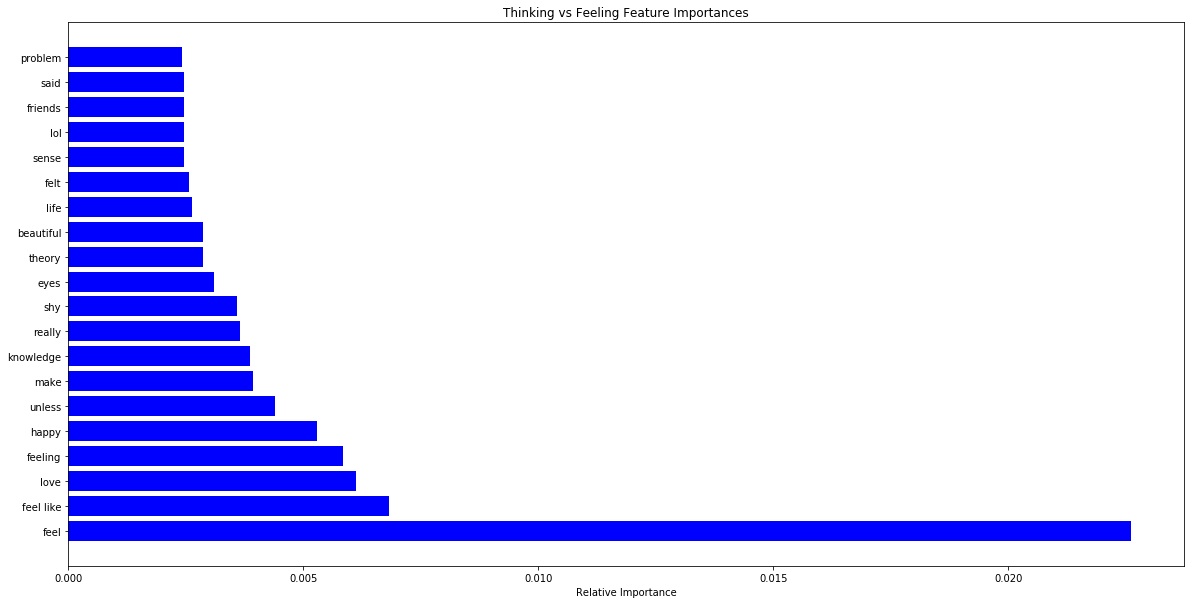

In [40]:
features = X.columns
importances = rfc_TF.feature_importances_
indices = np.argsort(importances)[::-1]
top_k = 20
indices = indices[:top_k]

plt.title('Thinking vs Feeling Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

- Reoccuring words: feel, love, feel like, beautiful, thank, life, happy, hope, felt, heart

This model did by far the strongest which makes sense given that it had the biggest sample size. 

The feature importance was also very stable. Thinking vs Feeling is more about how a person makes  their decisions. A Thinking person will base decisions solely on facts and are very absolute in their judgments. They see things in black or white. A Feeling person will base their decisions on how it would affect others. They take a more relative stance on issues and are more willing to bend the rules for the benefit of others.   

Thus, words like 'feel', feeling' and 'feel like' would point to a Feeling person whereas 'think' and 'knowledge' would indicate a Thinking person.

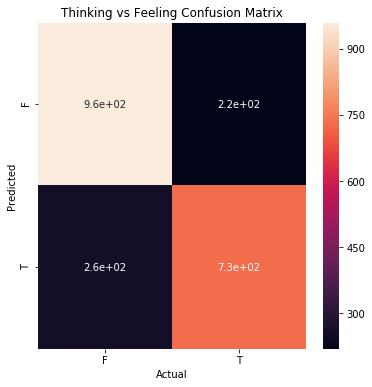

             precision    recall  f1-score   support

          F       0.81      0.79      0.80      1217
          T       0.74      0.77      0.75       952

avg / total       0.78      0.78      0.78      2169



In [41]:
personality_types_TF = sorted(tfidf_feature_matrix2.type_TF.unique())

Y_pred = lr_TF.predict(X_test)
confusion_array = confusion_matrix(Y_test, Y_pred)

df_cm = pd.DataFrame(confusion_array, index = [i for i in personality_types_TF],
                  columns = [i for i in personality_types_TF])

plt.figure(figsize = (6,6))

sns.heatmap(df_cm, annot=True)
plt.title('Thinking vs Feeling Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

print(classification_report(Y_pred, Y_test,  target_names=personality_types_TF))

## Twitter Application

In [42]:
import tweepy

ckey = "zLceR2GtRk7LiUMXRzLAYQ1ML"
csecret = "gUQWOfGKI7voYlfLD5rpl5KiQrXQTpzIQXLmPjsaYQO3cGhefo"
atoken = "819671108-WsXdRIP2tk9oBbh9ISPXAnKfVv567xPX1OsBDfSt"
asecret = "FSGAGxj2atE2HKqGlLYUS3KC9NGtzc8akeqlNBDrfgc1C"

auth = tweepy.OAuthHandler(ckey, csecret)

In [43]:
from langdetect import detect

MAX_TWEETS = 500

auth = tweepy.OAuthHandler(ckey, csecret)
api = tweepy.API(auth)

twitter_handles = []
for tweet in tweepy.Cursor(api.search, q='#INFP', rpp=100).items(MAX_TWEETS):
    if detect(tweet._json['text']) == 'en':
      twitter_handles.append(tweet.user.name)
    pass

print('Using Tweepy I searched Twitter posts with #INFP\nand scraped the following Twitter handles:\n')

print(twitter_handles)

Using Tweepy I searched Twitter posts with #INFP
and scraped the following Twitter handles:

['Buffy A Summers #SlipKid', 'Moonlight Night', 'ج .', 'JustPlainJane', 'Obaasant @144p', 'Joyce', '🌿 MICHI 🌿', 'VirtualOfficeSales', '🌈', 'ExerciseinFrugality', '¹⁶', '#INFP .♡', 'َ', '˗ لوسا\u200fں', 'Ely Bakouche', 'Gary Smith', 'Rebecca']


In [44]:
def get_twitter_type(twitter_handle):
    auth.set_access_token(atoken, asecret)

    api = tweepy.API(auth)

    stuff = api.user_timeline(screen_name = twitter_handle, count = 300, include_rts = False)

    twitter_text = ''
    for status in stuff:
        twitter_text += status.text
        twitter_text += ' '

    twitter_text = remove_url(twitter_text)
    twitter_text = remove_puncuation(twitter_text)
    twitter_text = remove_digits(twitter_text)
    twitter_text = remove_stop_words(twitter_text)
    twitter_text = remove_extra_white_space(twitter_text)
    twitter_text = remove_types(twitter_text)

    my_tfidf_matrix2 = tf.transform([twitter_text])

    my_tfidf_feature_matrix2 = pd.DataFrame(my_tfidf_matrix2.toarray(), columns=tf.get_feature_names())
    my_tfidf_feature_matrix2.head()

    print(lr_IE.predict(my_tfidf_feature_matrix2)[0] 
          + lr_NS.predict(my_tfidf_feature_matrix2)[0] 
          + lr_TF.predict(my_tfidf_feature_matrix2)[0] 
          + lr_JP.predict(my_tfidf_feature_matrix2)[0])

## get_twitter_type( YourTwitterHandleHere )

In [48]:
get_twitter_type('VincentCleopeGo')
get_twitter_type('Vivianne Ouya')
get_twitter_type('Moonlight Night')
get_twitter_type('Eliza Kinde')
get_twitter_type('inkandstars')

ESFP
ESFP
ESFP
ESFP
INFP


- The first 2 letters were the models with the LEAST amount of samples.
- The last letter had the worse accuracy scores but still got all of them correct.
- Third letter had the highest accuracy score and were all correct.
- 'inkandstars' was the most self aware and had the most Tweets that talked about their personality type and what it meant, similiar to the posts found on Personality Cafe.

## Summary

- It is possible to make it work.
- Need more samples.
- Sample text from people who are not self-aware of their type.
- Add other features.